In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
pima = pd.read_csv("C:\\Users\\Saeid\\OneDrive\\Desktop\\DataSet\\diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] 
y = pima['Outcome'] 
data= X.join(y)
data.head()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction,Outcome
0,6,0,33.6,50,148,72,0.627,1
1,1,0,26.6,31,85,66,0.351,0
2,8,0,23.3,32,183,64,0.672,1
3,1,94,28.1,21,89,66,0.167,0
4,0,168,43.1,33,137,40,2.288,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
feat_labels = data.columns[:7]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1) 
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) Pregnancies                    0.254549
 2) Insulin                        0.189754
 3) BMI                            0.141974
 4) Age                            0.138977
 5) Glucose                        0.104258
 6) BloodPressure                  0.089309
 7) DiabetesPedigreeFunction       0.081179


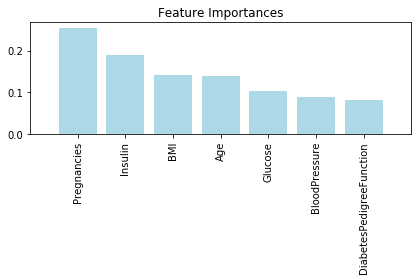

In [8]:
import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)                                    
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [9]:
feature_cols2 = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X1 = pima[feature_cols2] # Features
y1 = pima['Outcome'] # Target variable

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1) 

In [11]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [12]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X1_train,y1_train)
y1_pred = clf.predict(X1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y1_pred))

Accuracy: 0.7359307359307359
